In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import warnings
warnings.filterwarnings("ignore")
df =  pd.read_csv("/content/world_risk_index.csv")
print(df)

            Region    WRI  Exposure  Vulnerability  Susceptibility  \
0          Vanuatu  32.00     56.33          56.81           37.14   
1            Tonga  29.08     56.04          51.90           28.94   
2      Philippinen  24.32     45.09          53.93           34.99   
3        Salomonen  23.51     36.40          64.60           44.11   
4        Guatemala  20.88     38.42          54.35           35.36   
...            ...    ...       ...            ...             ...   
1912       Grenada   1.42      3.13          45.39           24.54   
1913      Barbados   1.32      3.46          38.26           18.20   
1914  Saudi Arabia   1.14      2.93          38.96           14.80   
1915         Malta   0.60      1.65          36.25           15.97   
1916         Qatar   0.08      0.28          28.18            9.68   

      Lack of Coping Capabilities   Lack of Adaptive Capacities  Year  \
0                           79.34                         53.96  2011   
1            

In [20]:
#데이터 구성 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [21]:
df[df.duplicated()]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category


In [22]:
df.isnull().sum()

,0
Region,0
WRI,0
Exposure,0
Vulnerability,0
Susceptibility,0
Lack of Coping Capabilities,0
Lack of Adaptive Capacities,1
Year,0
Exposure Category,0
WRI Category,1


In [23]:
df.rename(columns={
    ' Lack of Adaptive Capacities':'Lack of Adaptive Capacities'
},inplace = True)
df.isnull().sum()

,0
Region,0
WRI,0
Exposure,0
Vulnerability,0
Susceptibility,0
Lack of Coping Capabilities,0
Lack of Adaptive Capacities,1
Year,0
Exposure Category,0
WRI Category,1


In [24]:
df['Lack of Adaptive Capacities'].fillna(df['Lack of Adaptive Capacities'].mean(),inplace=True)
df.isnull().sum()

df.dropna(inplace = True)

df.isnull().sum()

,0
Region,0
WRI,0
Exposure,0
Vulnerability,0
Susceptibility,0
Lack of Coping Capabilities,0
Lack of Adaptive Capacities,0
Year,0
Exposure Category,0
WRI Category,0


In [25]:
df.describe()

df['Region'] = df['Region'].replace('Korea Republic of', 'Südkorea')
filtered_df = df[(df['Region'] == 'Südkorea')]
df.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000
mean,7.555758,15.386182,48.133488,30.757286,70.508138,43.135152,2016.042887
std,5.554435,10.246345,13.792223,15.668835,14.977959,13.511757,3.182770
min,0.020000,0.050000,20.970000,8.260000,35.160000,11.160000,2011.000000
25%,3.757500,10.115000,37.100000,17.807500,59.430000,33.217500,2013.000000
50%,6.525000,12.760000,47.105000,25.415000,74.230000,43.095000,2016.000000
75%,9.402500,16.450000,60.180000,42.702500,83.022500,53.082500,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [26]:
df.replace({'Exposure Category': {'Very High': 5}}, inplace = True)
df.replace({'Exposure Category': {'High': 4}}, inplace = True)
df.replace({'Exposure Category': {'Medium': 3}}, inplace = True)
df.replace({'Exposure Category': {'Low': 2}}, inplace = True)
df.replace({'Exposure Category': {'Very Low': 1}}, inplace = True)

In [27]:
df.replace({'Vulnerability Category': {'Very High': 5}}, inplace = True)
df.replace({'Vulnerability Category': {'High': 4}}, inplace = True)
df.replace({'Vulnerability Category': {'Medium': 3}}, inplace = True)
df.replace({'Vulnerability Category': {'Low': 2}}, inplace = True)
df.replace({'Vulnerability Category': {'Very Low': 1}}, inplace = True)

In [28]:
df.replace({'Susceptibility Category': {'Very High': 5}}, inplace = True)
df.replace({'Susceptibility Category': {'High': 4}}, inplace = True)
df.replace({'Susceptibility Category': {'Medium': 3}}, inplace = True)
df.replace({'Susceptibility Category': {'Low': 2}}, inplace = True)
df.replace({'Susceptibility Category': {'Very Low': 1}}, inplace = True)

In [29]:
df.replace({'WRI Category': {'Very High': 5}}, inplace = True)
df.replace({'WRI Category': {'High': 4}}, inplace = True)
df.replace({'WRI Category': {'Medium': 3}}, inplace = True)
df.replace({'WRI Category': {'Low': 2}}, inplace = True)
df.replace({'WRI Category': {'Very Low': 1}}, inplace = True)

44 13 0.333006069612701


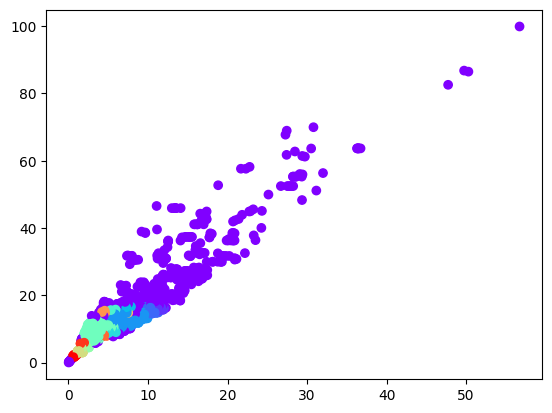

In [30]:
#dbscan 잘되는 것
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
df_dbscan = df.drop(columns=['Year','Region'])
training_points = df_dbscan[["WRI", "Exposure"]]
training_labels = df_dbscan["WRI Category"]

max = 0.0
for i in range(1, 250, 1):
    for j in range(1, 100, 1):
        dbscan = DBSCAN(eps=i*0.01, min_samples=j).fit(training_points)
        arc = adjusted_rand_score(training_labels, dbscan.labels_)
        if max < arc:
            max = arc
            a = i
            b = j



print(a, b, max)
dbscan = DBSCAN(eps=a*0.01, min_samples=b).fit(training_points)
arc = adjusted_rand_score(training_labels, dbscan.labels_)


plt.scatter(training_points["WRI"], training_points["Exposure"], c=dbscan.labels_,
cmap='rainbow')
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = [['Exposure']]
for feature in features:
    df_dbscan[feature] = scaler.fit_transform(df_dbscan[feature])

8 16 0.46531440418911274


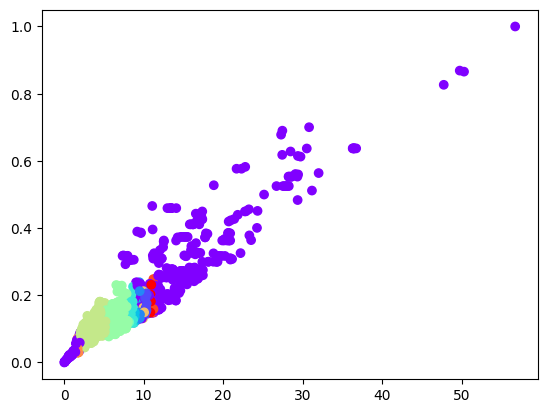

In [32]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

training_points = df_dbscan[["WRI", "Exposure"]]
training_labels = df_dbscan["WRI Category"]

max = 0.0
for i in range(1, 250, 1):
    for j in range(1, 100, 1):
        dbscan = DBSCAN(eps=i*0.01, min_samples=j).fit(training_points)
        arc = adjusted_rand_score(training_labels, dbscan.labels_)
        if max < arc:
            max = arc
            a = i
            b = j


print(a, b, max)
dbscan = DBSCAN(eps=a*0.01, min_samples=b).fit(training_points)
arc = adjusted_rand_score(training_labels, dbscan.labels_)


plt.scatter(training_points["WRI"], training_points["Exposure"], c=dbscan.labels_,
cmap='rainbow')
plt.show()

8 0.3244129919050673


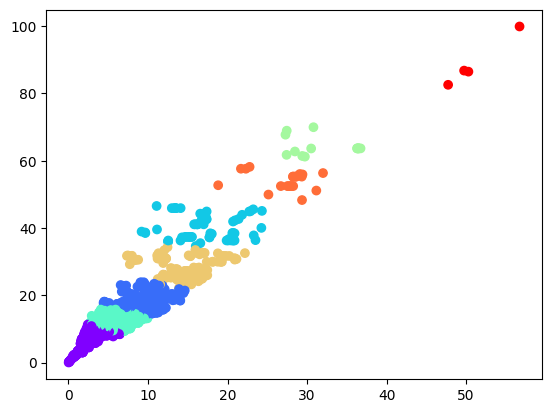

In [33]:
#k-means 잘되는 것
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
df_kmeans = df.drop(columns=['Year','Region'])
training_points = df_kmeans[["WRI", "Exposure"]]
training_labels = df_kmeans["WRI Category"]

max = 0.0
for i in range(1, 200, 1):
    kmeans = KMeans(n_clusters=i).fit(training_points)
    arc = adjusted_rand_score(training_labels, kmeans.labels_)
    if max < arc:
        max = arc
        a = i

print(a, max)

kmeans = KMeans(n_clusters=a).fit(training_points)
plt.scatter(training_points["WRI"], training_points["Exposure"], c=kmeans.labels_, cmap='rainbow')
arc = adjusted_rand_score(training_labels, kmeans.labels_)

plt.show()

In [34]:
# 12. Improving Accuracy: Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#Rescaling features age, thalach, oldpeak.
scaler = MinMaxScaler()

features = [['Exposure']]
for feature in features:
    df_kmeans[feature] = scaler.fit_transform(df_kmeans[feature])

9 0.6712822845011887


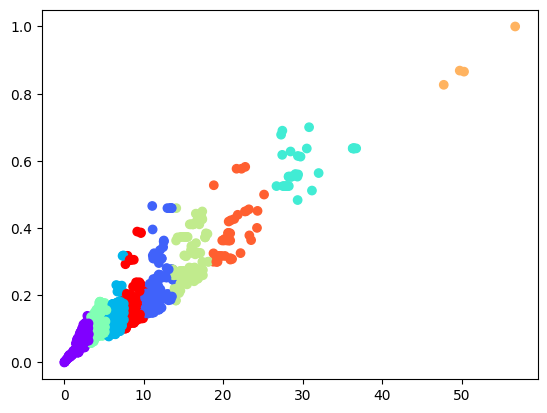

In [35]:
#k-means 잘되는 것
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score

training_points = df_kmeans[["WRI", "Exposure"]]
training_labels = df_kmeans["WRI Category"]

max = 0.0
for i in range(1, 200, 1):
    kmeans = KMeans(n_clusters=i).fit(training_points)
    arc = adjusted_rand_score(training_labels, kmeans.labels_)
    if max < arc:
        max = arc
        a = i

print(a, max)

kmeans = KMeans(n_clusters=a).fit(training_points)
plt.scatter(training_points["WRI"], training_points["Exposure"], c=kmeans.labels_, cmap='rainbow')
arc = adjusted_rand_score(training_labels, kmeans.labels_)

plt.show()

In [36]:
print(df['Exposure Category'].value_counts())
print()
print(df['Exposure Category'].value_counts()/np.float64(len(df)))

Exposure Category
1    393
5    382
3    380
2    379
4    378
Name: count, dtype: int64

Exposure Category
1    0.205544
5    0.199791
3    0.198745
2    0.198222
4    0.197699
Name: count, dtype: float64


In [37]:
#KNN
from sklearn.model_selection import train_test_split

df_KNN = df.drop(['Region'],axis=1)
training_points = df_KNN.drop(columns=['WRI Category'])
training_labels = df_KNN['WRI Category']

X_train, X_test, y_train, y_test = train_test_split(
	training_points,
	training_labels,
	test_size=0.3,
	random_state=4)

df.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.00000
mean,7.555758,15.386182,48.133488,30.757286,70.508138,43.135152,2016.042887,2.987971,2.991109,2.994770,2.99477
std,5.554435,10.246345,13.792223,15.668835,14.977959,13.511757,3.182770,1.420623,1.418435,1.416053,1.41753
min,0.020000,0.050000,20.970000,8.260000,35.160000,11.160000,2011.000000,1.000000,1.000000,1.000000,1.00000
25%,3.757500,10.115000,37.100000,17.807500,59.430000,33.217500,2013.000000,2.000000,2.000000,2.000000,2.00000
50%,6.525000,12.760000,47.105000,25.415000,74.230000,43.095000,2016.000000,3.000000,3.000000,3.000000,3.00000
75%,9.402500,16.450000,60.180000,42.702500,83.022500,53.082500,2019.000000,4.000000,4.000000,4.000000,4.00000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000,5.000000,5.000000,5.000000,5.00000


[0.8885017421602788, 0.8432055749128919, 0.8466898954703833, 0.8414634146341463, 0.8466898954703833, 0.8257839721254355, 0.8292682926829268, 0.8205574912891986, 0.8222996515679443, 0.8083623693379791, 0.8048780487804879, 0.7822299651567944, 0.7804878048780488, 0.7752613240418118, 0.7717770034843205, 0.7717770034843205, 0.7752613240418118, 0.7630662020905923, 0.7491289198606271, 0.7526132404181185, 0.7439024390243902, 0.7526132404181185, 0.7439024390243902, 0.7439024390243902, 0.740418118466899, 0.7369337979094077, 0.7212543554006968, 0.7212543554006968, 0.7264808362369338, 0.7195121951219512, 0.7195121951219512, 0.7142857142857143, 0.7003484320557491, 0.7073170731707317, 0.7038327526132404, 0.7020905923344948, 0.6898954703832753, 0.6951219512195121, 0.686411149825784, 0.6829268292682927, 0.6724738675958188, 0.6742160278745645, 0.6707317073170732, 0.6602787456445993, 0.6515679442508711, 0.6567944250871081, 0.6463414634146342, 0.6550522648083623, 0.6567944250871081, 0.6533101045296167, 0

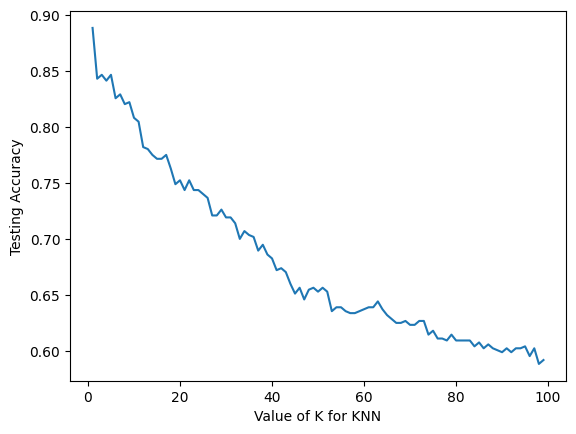

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
k_range = range(1, 100)

accuracy_scores = []
max_k, accuracy = 0, 0.0

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    if metrics.accuracy_score(y_test, guesses) > accuracy:
        accuracy = metrics.accuracy_score(y_test, guesses)
        max_k = k
print(accuracy_scores)
print("Highest accuracy: {}, k: {}".format(accuracy, max_k))
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

<Axes: >

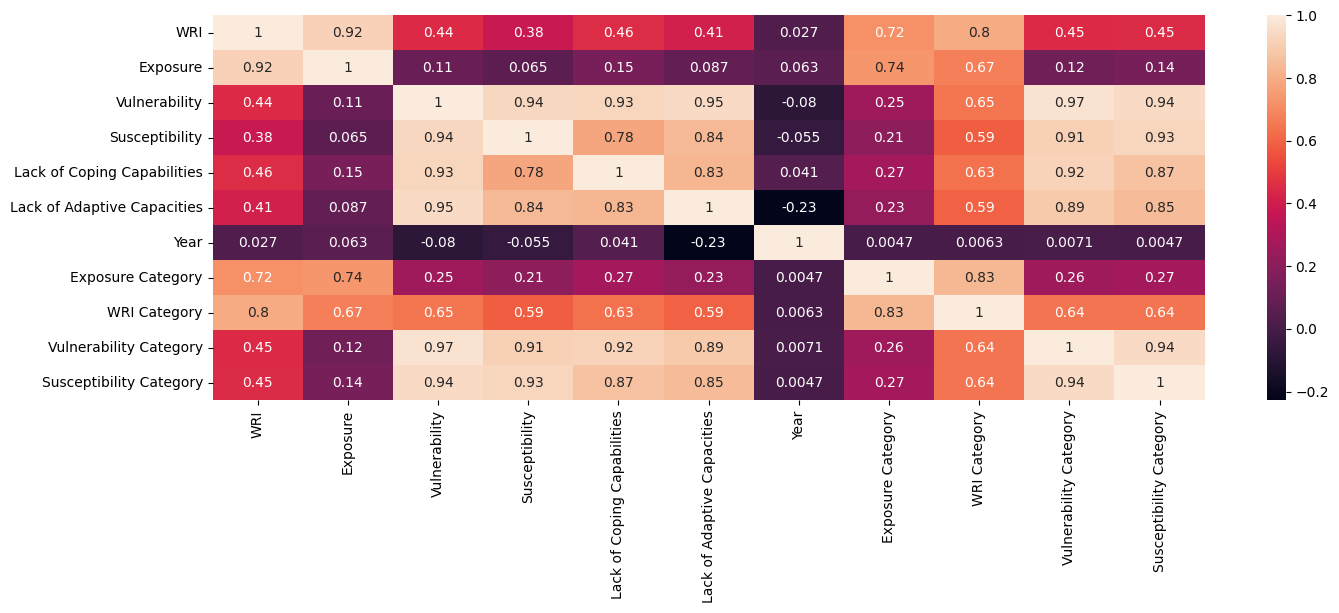

In [39]:
# 9. Improving Accuracy: Feature Engineering

dfcorr = df_KNN.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [40]:
df_KNN = df.drop(columns=['Year','Region'])

In [41]:
# 11. Split data into separate training and test set
training_points = df_KNN.drop(columns=['WRI Category'])
training_labels = df_KNN['WRI Category']

X_train, X_test, y_train, y_test = train_test_split(
	training_points,
	training_labels,
	test_size=0.3,
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1338, 9)
(1338,)
(574, 9)
(574,)


[0.9041811846689896, 0.8815331010452961, 0.8623693379790941, 0.8588850174216028, 0.8449477351916377, 0.8310104529616724, 0.837979094076655, 0.818815331010453, 0.8397212543554007, 0.8240418118466899, 0.8153310104529616, 0.8101045296167247, 0.8101045296167247, 0.7979094076655052, 0.7874564459930313, 0.789198606271777, 0.7961672473867596, 0.7752613240418118, 0.7665505226480837, 0.759581881533101, 0.7560975609756098, 0.7508710801393729, 0.7526132404181185, 0.7456445993031359, 0.7439024390243902, 0.7369337979094077, 0.7369337979094077, 0.7334494773519163, 0.7299651567944251, 0.7282229965156795, 0.7282229965156795, 0.7334494773519163, 0.7264808362369338, 0.7264808362369338, 0.7247386759581882, 0.7229965156794426, 0.7195121951219512, 0.7160278745644599, 0.6951219512195121, 0.6968641114982579, 0.6898954703832753, 0.686411149825784, 0.6759581881533101, 0.6794425087108014, 0.6724738675958188, 0.6759581881533101, 0.6777003484320557, 0.6707317073170732, 0.6585365853658537, 0.6567944250871081, 0.64

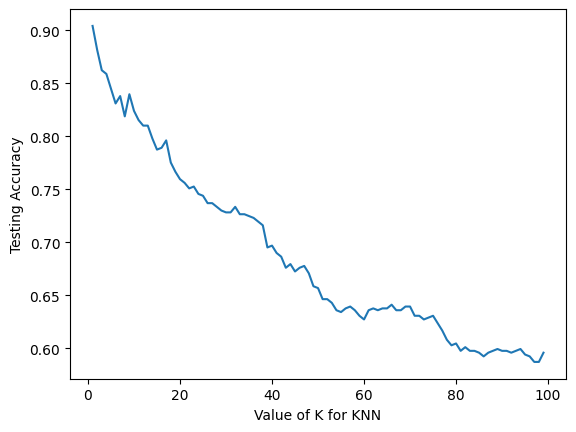

In [42]:
# 14. Tuning k parameter
k_range = range(1, 100)

accuracy_scores = []
max_k, accuracy = 0, 0.0

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    if metrics.accuracy_score(y_test, guesses) > accuracy:
        accuracy = metrics.accuracy_score(y_test, guesses)
        max_k = k
print(accuracy_scores)
print("Highest accuracy: {}, k: {}".format(accuracy, max_k))
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [43]:
df_KNN.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.00000
mean,7.555758,15.386182,48.133488,30.757286,70.508138,43.135152,2.987971,2.991109,2.994770,2.99477
std,5.554435,10.246345,13.792223,15.668835,14.977959,13.511757,1.420623,1.418435,1.416053,1.41753
min,0.020000,0.050000,20.970000,8.260000,35.160000,11.160000,1.000000,1.000000,1.000000,1.00000
25%,3.757500,10.115000,37.100000,17.807500,59.430000,33.217500,2.000000,2.000000,2.000000,2.00000
50%,6.525000,12.760000,47.105000,25.415000,74.230000,43.095000,3.000000,3.000000,3.000000,3.00000
75%,9.402500,16.450000,60.180000,42.702500,83.022500,53.082500,4.000000,4.000000,4.000000,4.00000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,5.000000,5.000000,5.000000,5.00000


In [44]:
# 12. Improving Accuracy: Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#Rescaling features age, thalach, oldpeak.
scaler = MinMaxScaler()

features = [['Exposure','Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities','Lack of Adaptive Capacities']]
for feature in features:
    df_KNN[feature] = scaler.fit_transform(df_KNN[feature])

In [45]:
df_KNN.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.00000
mean,7.555758,0.153623,0.489432,0.359554,0.597097,0.492304,2.987971,2.991109,2.994770,2.99477
std,5.554435,0.102638,0.248509,0.250421,0.253006,0.208033,1.420623,1.418435,1.416053,1.41753
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000
25%,3.757500,0.100821,0.290631,0.152589,0.409966,0.339607,2.000000,2.000000,2.000000,2.00000
50%,6.525000,0.127316,0.470901,0.274173,0.659966,0.491686,3.000000,3.000000,3.000000,3.00000
75%,9.402500,0.164279,0.706486,0.550463,0.808488,0.645458,4.000000,4.000000,4.000000,4.00000
max,56.710000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.00000


In [46]:
# 11. Split data into separate training and test set
training_points = df_KNN.drop(columns=['WRI Category'])
training_labels = df_KNN['WRI Category']

X_train, X_test, y_train, y_test = train_test_split(
	training_points,
	training_labels,
	test_size=0.2,
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1529, 9)
(1529,)
(383, 9)
(383,)


Highest accuracy: 0.9530026109660574, k: 20


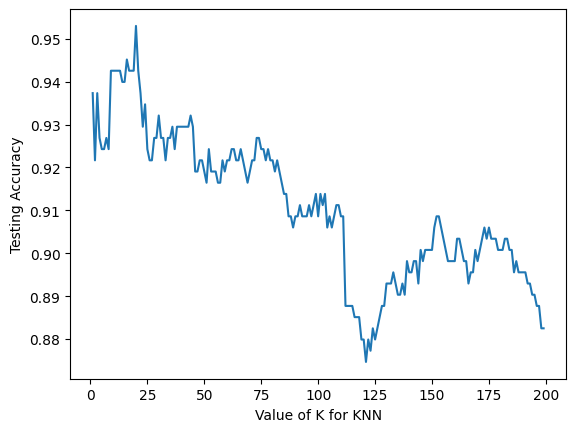

In [47]:
# 14. Tuning k parameter
k_range = range(1, 200)

accuracy_scores = []
max_k, accuracy = 0, 0.0

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    if metrics.accuracy_score(y_test, guesses) > accuracy:
        accuracy = metrics.accuracy_score(y_test, guesses)
        max_k = k
# print(accuracy_scores)
print("Highest accuracy: {}, k: {}".format(accuracy, max_k))
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [48]:
# 11. Split data into separate training and test set
training_points = df_KNN.drop(columns=['WRI Category'])
training_labels = df_KNN['WRI Category']

X_train, X_test, y_train, y_test = train_test_split(
	training_points,
	training_labels,
	test_size=0.3,
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1338, 9)
(1338,)
(574, 9)
(574,)


Highest accuracy: 0.9477351916376306, k: 9


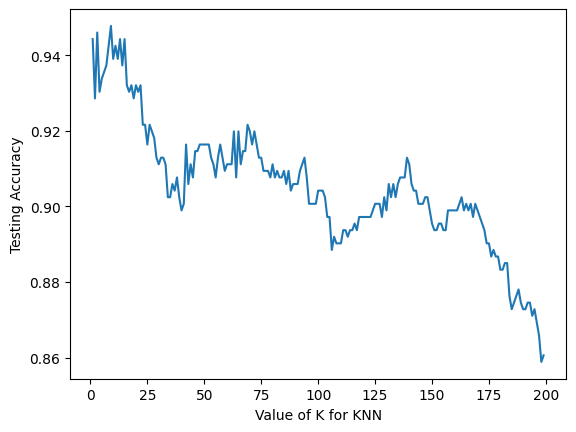

In [49]:
# 14. Tuning k parameter
k_range = range(1, 200)

accuracy_scores = []
max_k, accuracy = 0, 0.0

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    if metrics.accuracy_score(y_test, guesses) > accuracy:
        accuracy = metrics.accuracy_score(y_test, guesses)
        max_k = k
# print(accuracy_scores)
print("Highest accuracy: {}, k: {}".format(accuracy, max_k))
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[108  10   0   0   0]
 [ 17  81   9   0   0]
 [  0   5  90  22   2]
 [  0   0  13  92  11]
 [  0   0   0  18  96]]
0.813588850174216


In [51]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[112   6   0   0   0]
 [  2 103   2   0   0]
 [  0   5 104  10   0]
 [  0   0   8 107   1]
 [  0   0   0   4 110]]
0.9337979094076655


In [52]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'poly')
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[117   1   0   0   0]
 [ 30  74   3   0   0]
 [  0   1 111   7   0]
 [  0   0   9 105   2]
 [  0   0   0   3 111]]
0.9024390243902439


In [53]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[114   4   0   0   0]
 [  9  92   6   0   0]
 [  0   1 111   7   0]
 [  0   0  12 102   2]
 [  0   0   0   1 113]]
0.926829268292683


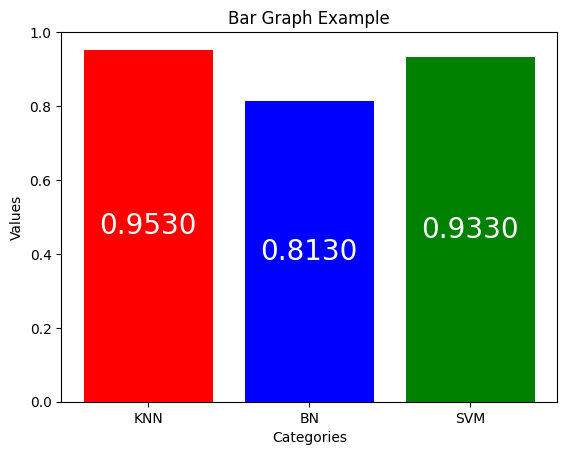

In [54]:
import matplotlib.pyplot as plt

# 데이터
categories = ['KNN', 'BN', 'SVM']
values = [0.953, 0.813, 0.933]

# 바 그래프 그리기
bars = plt.bar(categories, values, color=['red', 'blue', 'green'])

# 각 바의 중간에 정확도 값 표시 (글자 크기 조절)
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{value:.4f}',
        ha='center',
        va='center',
        color='white',
        fontsize=20  # 원하는 글자 크기로 조절
    )

# 그래프에 제목과 축 레이블 추가
plt.title('Bar Graph Example')
plt.xlabel('Categories')
plt.ylabel('Values')

# 그래프 표시
plt.show()

In [55]:
#Decision Tree
train_points = df_KNN.drop("WRI Category", axis=1)
train_labels = df_KNN["WRI Category"]

# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels,
					test_size=0.2, random_state=5)

In [56]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=0)

#Train the model using the training sets
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

In [57]:
#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[69  8  0  0  0]
 [ 3 79  5  0  0]
 [ 0  2 78  2  0]
 [ 0  0  2 65  4]
 [ 0  0  0  3 63]]
Accuracy: 0.9242819843342036


In [58]:
#Decision Tree
train_points = df_KNN.drop("WRI Category", axis=1)
train_labels = df_KNN["WRI Category"]

# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels,
					test_size=0.3, random_state=5)

In [59]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=0)

#Train the model using the training sets
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

In [60]:
#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[110   8   0   0   0]
 [  5 112   7   0   0]
 [  0   5 114   2   0]
 [  0   0   4 103   4]
 [  0   0   0   1  99]]
Accuracy: 0.9372822299651568


In [61]:
#Decision Tree
train_points = df_KNN.drop("WRI Category", axis=1)
train_labels = df_KNN["WRI Category"]

# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels,
					test_size=0.2, random_state=5)

0.9399477806788512 16


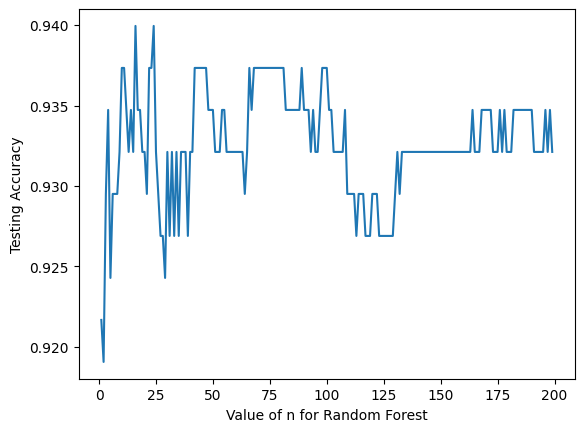

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 200)
accuracy_scores = []
max_num = 0.0
max_n = 0
for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
    if max_num < accuracy_score(y_test, guesses):
        max_num = accuracy_score(y_test, guesses)
        max_n = n
# print(accuracy_scores)
print(max_num,max_n)
import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

In [63]:
#Decision Tree
train_points = df_KNN.drop("WRI Category", axis=1)
train_labels = df_KNN["WRI Category"]

# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels,
					test_size=0.3, random_state=5)

0.9512195121951219 8


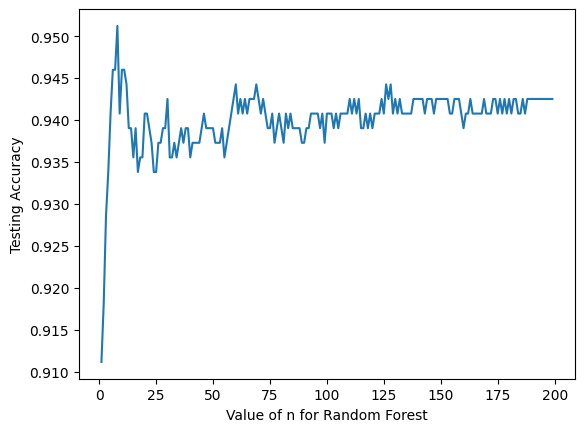

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 200)
accuracy_scores = []
max_num = 0.0
max_n = 0
for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
    if max_num < accuracy_score(y_test, guesses):
        max_num = accuracy_score(y_test, guesses)
        max_n = n
# print(accuracy_scores)
print(max_num,max_n)
import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

In [65]:
#AdaBoost
train_points = df_KNN.drop("WRI Category", axis=1)
train_labels = df_KNN["WRI Category"]

# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels,
					test_size=0.3, random_state=5)

0.9320557491289199 16


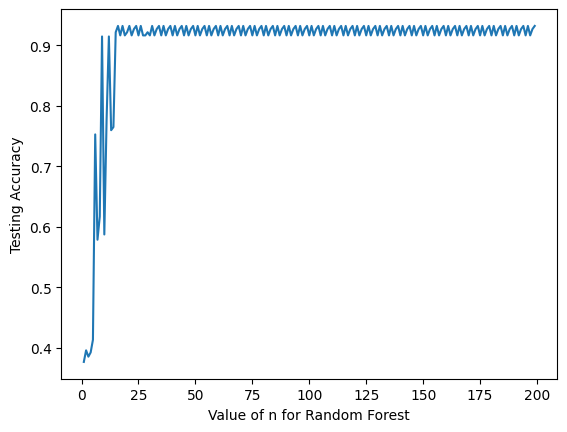

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 200)
accuracy_scores = []
max_num = 0.0
max_n = 0

for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
    if max_num < accuracy_score(y_test, guesses):
        max_num = accuracy_score(y_test, guesses)
        max_n = n
# print(accuracy_scores)
print(max_num,max_n)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

In [67]:
#AdaBoost
train_points = df_KNN.drop("WRI Category", axis=1)
train_labels = df_KNN["WRI Category"]

# standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(train_points)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_points_scaled, train_labels,
					test_size=0.2, random_state=5)

0.9216710182767625 9


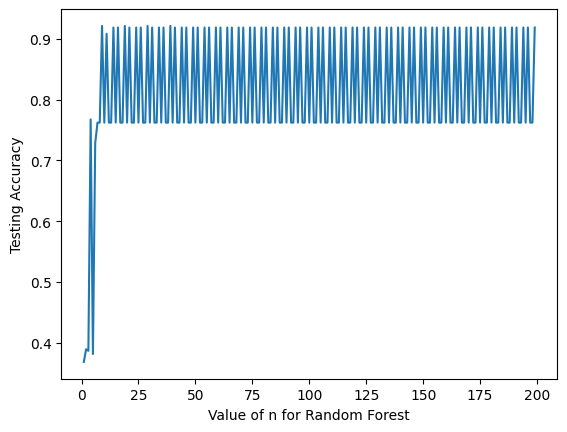

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 200)
accuracy_scores = []
max_num = 0.0
max_n = 0

for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
    if max_num < accuracy_score(y_test, guesses):
        max_num = accuracy_score(y_test, guesses)
        max_n = n
# print(accuracy_scores)
print(max_num,max_n)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

0.9399477806788512


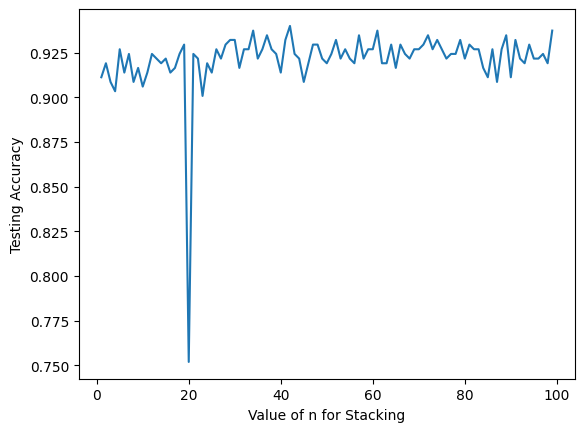

In [69]:
# stacking : ada, svm, knn / final : decisiontree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
n_range = range(1, 100)
j_range = range(1, 100)
accuracy_scores = []
max_accuracy = 0.0
for i in n_range:
    base_models = [
    ('ada',AdaBoostClassifier(random_state=0, n_estimators=i)),
    ('svm', SVC(kernel = 'linear')),
    ('knn', KNeighborsClassifier(n_neighbors = i))
    ]
    classifier = StackingClassifier(
        estimators=base_models, final_estimator=DecisionTreeClassifier()
    )
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
    if max_num < accuracy_score(y_test, guesses):
        max_num = accuracy_score(y_test, guesses)
print(max_num)

# print(max(accuracy_scores))
import matplotlib.pyplot as plt
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Stacking')
plt.ylabel('Testing Accuracy')
plt.show()

0.9399477806788512


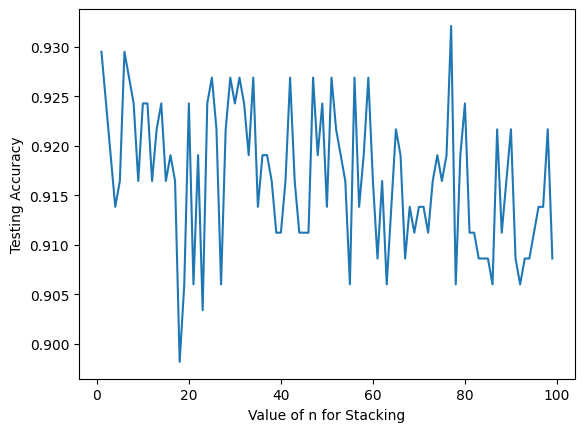

In [70]:
# stacking : decisiontree, svm, knn / final : decisiontree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
n_range = range(1, 100)
j_range = range(1, 100)
accuracy_scores = []
max_accuracy = 0.0
for i in n_range:
    base_models = [
    ('decison_tree',DecisionTreeClassifier(random_state=0)),
    ('svm', SVC(kernel = 'linear')),
    ('knn', KNeighborsClassifier(n_neighbors = i))
    ]
    classifier = StackingClassifier(
        estimators=base_models, final_estimator=DecisionTreeClassifier()
    )
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
    if max_num < accuracy_score(y_test, guesses):
        max_num = accuracy_score(y_test, guesses)
print(max_num)

# print(max(accuracy_scores))
import matplotlib.pyplot as plt
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Stacking')
plt.ylabel('Testing Accuracy')
plt.show()

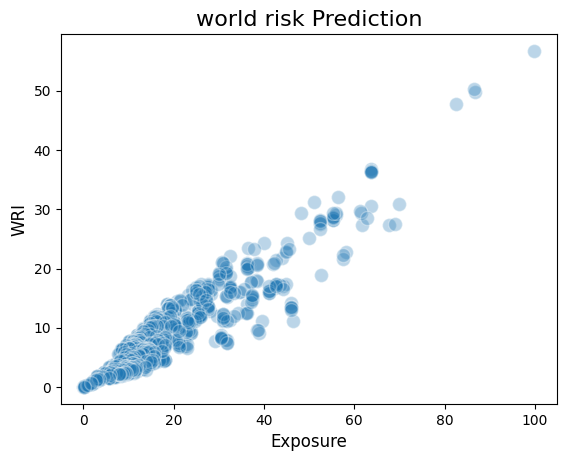

In [72]:
plt.scatter(x = 'Exposure', y = 'WRI',
		data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('world risk Prediction', fontsize = 16)
plt.ylabel('WRI', fontsize = 12)
plt.xlabel('Exposure', fontsize = 12)

plt.savefig('enginesize_co2.png')

In [73]:
from sklearn.model_selection import train_test_split

X_var = df[['Exposure']] # independent variable
y_var = df['WRI'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.2, random_state = 0)

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

0.8315884408449941


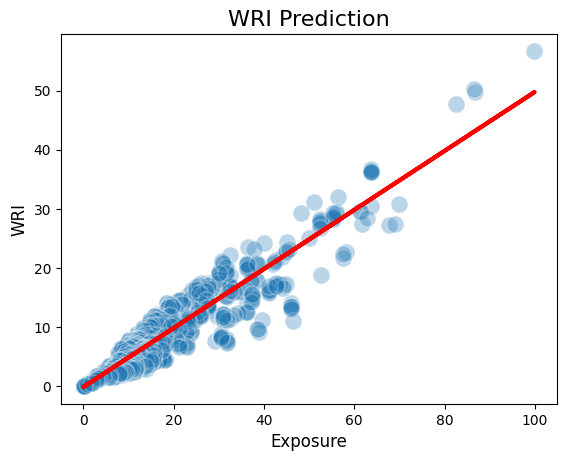

In [75]:
from sklearn.metrics import r2_score
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'Exposure', y = 'WRI',
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Exposure'], slr_slope*df['Exposure'] + slr_intercept,
		color = 'r', linewidth = 3)
plt.title('WRI Prediction', fontsize = 16)
plt.ylabel('WRI', fontsize = 12)
plt.xlabel('Exposure', fontsize = 12)
print(r2_score(y_test, yhat))
plt.savefig('WRI.png')

In [76]:
from sklearn.model_selection import train_test_split

X_var = df[['Exposure']] # independent variable
y_var = df['WRI'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

0.8463450530811228


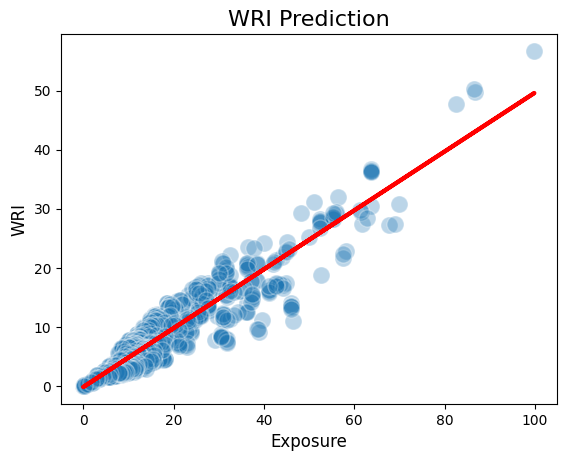

In [78]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'Exposure', y = 'WRI',
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Exposure'], slr_slope*df['Exposure'] + slr_intercept,
		color = 'r', linewidth = 3)
plt.title('WRI Prediction', fontsize = 16)
plt.ylabel('WRI', fontsize = 12)
plt.xlabel('Exposure', fontsize = 12)
print(r2_score(y_test, yhat))
plt.savefig('WRI.png')

In [79]:
from sklearn.model_selection import train_test_split

X1_var = df[['Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities','Lack of Adaptive Capacities']]
y_var = df['WRI'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var,
		y_var,
		test_size = 0.2,
		random_state = 0)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

0.9569472867168622


0.9569472867168622


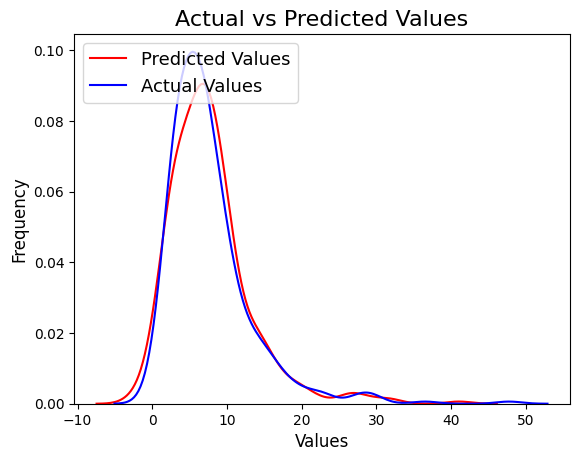

In [80]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
print(r2_score(y_test, yhat))
plt.savefig('ap.png')

In [81]:
from sklearn.model_selection import train_test_split

X1_var = df[['Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities','Lack of Adaptive Capacities']]
y_var = df['WRI'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var,
		y_var,
		test_size = 0.3,
		random_state = 0)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

0.9633605713408238


0.9633605713408238


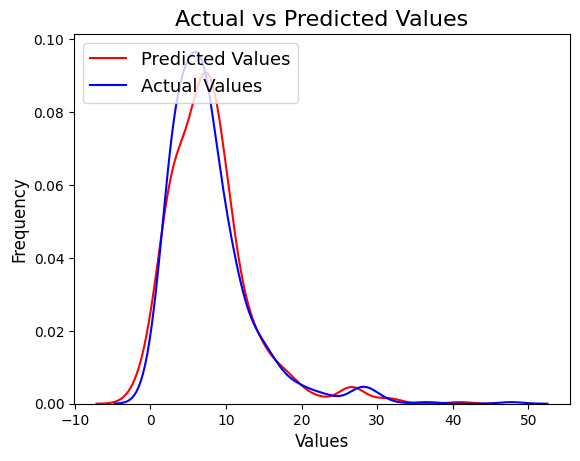

In [82]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
print(r2_score(y_test, yhat))
plt.savefig('ap.png')

In [84]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yhat, y_test)
print(mse**0.5)

1.0900173581077361


In [85]:
import statsmodels.api as sm
x_data2 = df[['Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities','Lack of Adaptive Capacities']]
target = df['WRI'] # dependent variable

# 상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WRI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.018e+04
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        05:43:36   Log-Likelihood:                -2815.3
No. Observations:                1912   AIC:                             5643.
Df Residuals:                    1906   BIC:                             5676.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.7864      0.135    -50.162      0.000      -7.052      -6.521
Exposure                        0.4769      0.002    199.190      0.000       0.472       0.482
Vulnerability                  11.6896      7.580      1.542      0.123      -3.176      26.556
Susceptibility                 -3.8603      2.527     -1.528      0.127      -8.816       1.095
Lack of Coping Capabilities    -3.8491      2.527     -1.523      0.128      -8.805       1.106
Lack of Adaptive Capacities    -3.8376      2.527     -1.519      0.129      -8.793       1.118
==============================================================================
Omnibus:                      443.093   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12827.678
Skew:                          -0.419   Prob(JB):                         0.00
Kurtosis:                      15.661   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
x_data2 = df[['Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities','Lack of Adaptive Capacities']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns #여기바꿈
vif

,VIF Factor,features
0,3.315409e+00,Exposure
1,2.465728e+08,Vulnerability
2,1.302049e+07,Susceptibility
3,5.678113e+07,Lack of Coping Capabilities
4,2.232623e+07,Lack of Adaptive Capacities


In [87]:
vif = pd.DataFrame()
x_data3 = x_data2.drop("Vulnerability",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,3.315091,Exposure
1,14.473757,Susceptibility
2,38.405810,Lack of Coping Capabilities
3,51.245801,Lack of Adaptive Capacities


In [88]:
# nox 변수를 제거한 x_data3 상수항 추가 후 회귀모델 적합시키기
# nox, rm 변수를 제거한 x_data4 상수항 추가 후 회귀모델 적합시키기

x_data3_ = sm.add_constant(x_data3, has_constant = "add")
x_data4_ = sm.add_constant(x_data2, has_constant = "add") #여기바꿈

model_vif = sm.OLS(target, x_data3_)
fitted_model_vif = model_vif.fit()

model_vif2 = sm.OLS(target,x_data4_)
fitted_model_vif2 = model_vif2.fit() #여기 바꿈

# 두 vif를 통한 변수제거 회귀모델의 결과를 비교

fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WRI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.272e+04
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        05:44:26   Log-Likelihood:                -2816.5
No. Observations:                1912   AIC:                             5643.
Df Residuals:                    1907   BIC:                             5671.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.7908      0.135    -50.188      0.000      -7.056      -6.525
Exposure                        0.4769      0.002    199.151      0.000       0.472       0.482
Susceptibility                  0.0363      0.003     12.261      0.000       0.030       0.042
Lack of Coping Capabilities     0.0476      0.003     15.516      0.000       0.042       0.054
Lack of Adaptive Capacities     0.0588      0.004     15.341      0.000       0.051       0.066
==============================================================================
Omnibus:                      443.459   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12790.059
Skew:                          -0.422   Prob(JB):                         0.00
Kurtosis:                      15.642   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

# 독립 변수와 종속 변수 설정
X1_var = df[['Exposure','Susceptibility','Lack of Coping Capabilities','Lack of Adaptive Capacities']]
y_var = df['WRI']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X1_var,
    y_var,
    test_size=0.3,
    random_state=0
)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge 회귀 모델 생성
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# 테스트 데이터 예측
yhat_ridge = ridge.predict(X_test_scaled)

# R-squared 출력
print("R-squared (Ridge):", r2_score(y_test, yhat_ridge))

# OLS 회귀 모델 적합
X_train_ols = sm.add_constant(X_train_scaled)  # 상수항 추가
ols_model = sm.OLS(y_train, X_train_ols)
ols_results = ols_model.fit()

# 결과 출력
print(ols_results.summary())

R-squared (Ridge): 0.9632810045289117
                            OLS Regression Results                            
Dep. Variable:                    WRI   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     8926.
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        05:44:46   Log-Likelihood:                -1952.1
No. Observations:                1338   AIC:                             3914.
Df Residuals:                    1333   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         